## Insurace Cross Selling

- competition https://www.kaggle.com/competitions/playground-series-s4e7

In [140]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [141]:
original = pd.read_csv('test.csv')
original.shape

(7669866, 11)

In [142]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [143]:
test.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [144]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [145]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

+ No empty values moving on

<Axes: >

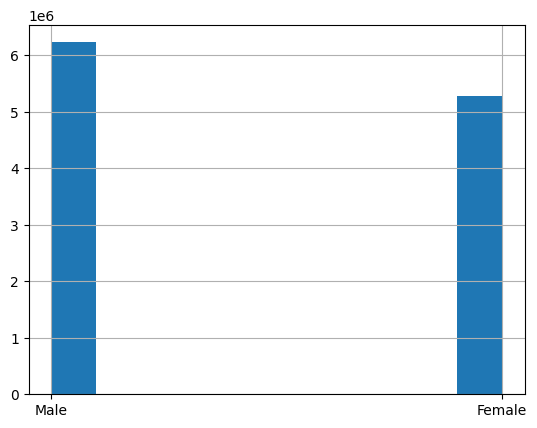

In [146]:
train.Gender.hist()

+ male females almost equivalent so no need to do any changes, just convert them into one hot encoding

In [147]:
# perform one hot encoding on Gender column

train = pd.get_dummies(train, columns=['Gender'])
test = pd.get_dummies(test, columns=['Gender'])
train

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,False,True
1,1,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,False,True
2,2,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,True,False
3,3,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,True,False
4,4,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0,False,True
11504794,11504794,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1,True,False
11504795,11504795,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0,True,False
11504796,11504796,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1,True,False


<Axes: >

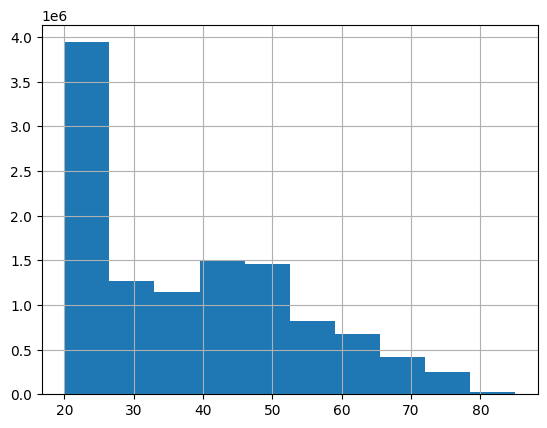

In [148]:
train.Age.hist()

+ I can see there are alot of people between the age of 20-25 and then there is a drastic reduction, I think it would be better to change it into categories of 20-30, 30-50, 50 and above

<Axes: >

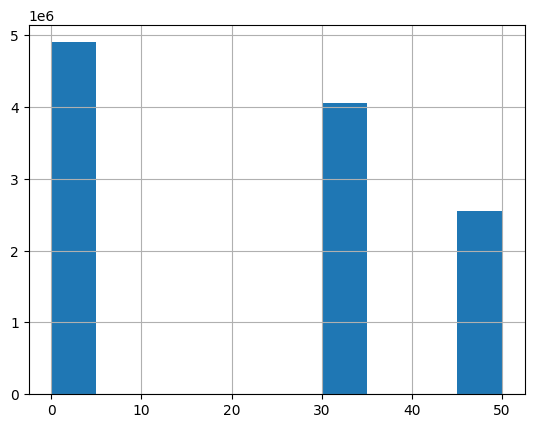

In [149]:
# perform binning on Age column

train.Age = pd.cut(train.Age, bins=[0, 30, 50, 120], labels=[0, 30, 50])
train.Age.hist()

In [150]:
test.Age = pd.cut(test.Age, bins=[0, 30, 50, 120], labels=[0, 30, 50])

<Axes: >

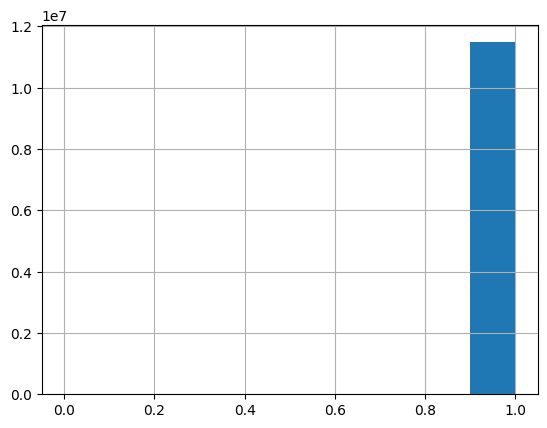

In [151]:
train.Driving_License.hist()

+ looks like it only has value 1 so we can just skip this column

In [152]:
train.drop('Driving_License', axis=1, inplace=True)
test.drop('Driving_License', axis=1, inplace=True)

<Axes: >

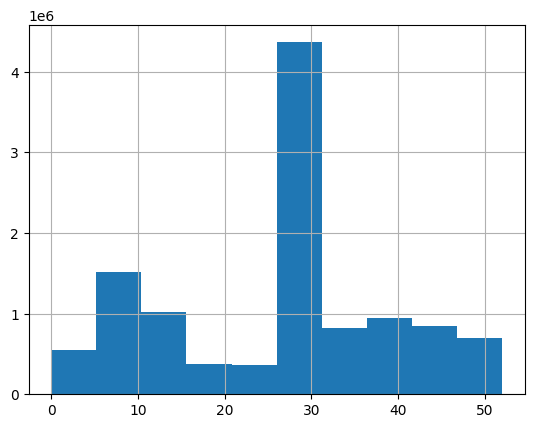

In [153]:
train.Region_Code.hist()

+ Again looks like the reigon code is very skewed toward 25-35, so we can bin it into 0-25, 25-35, 35 and above

<Axes: >

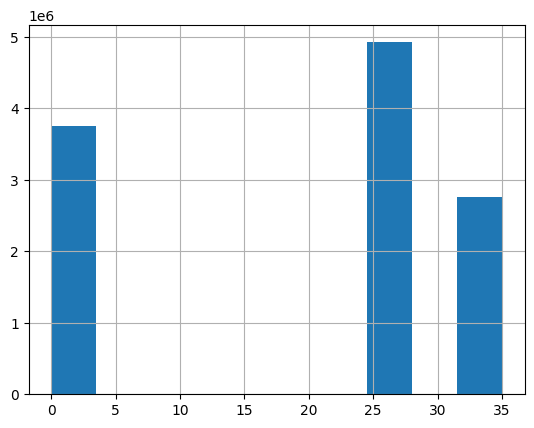

In [154]:
# perform binning on Region_Code column

train.Region_Code = pd.cut(train.Region_Code, bins=[0, 25, 35, 60], labels=[0, 25, 35])
train.Region_Code.hist()

In [155]:
test.Region_Code = pd.cut(test.Region_Code, bins=[0, 25, 35, 60], labels=[0, 25, 35])

<Axes: >

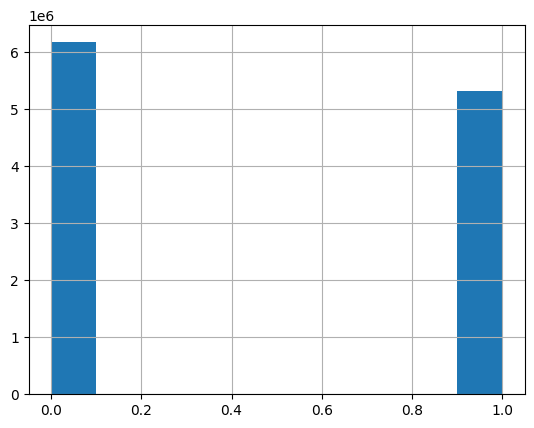

In [156]:
train.Previously_Insured.hist()

+ previously insured has good amount of values in both the classes so I believe we can let it stay as it is

<Axes: >

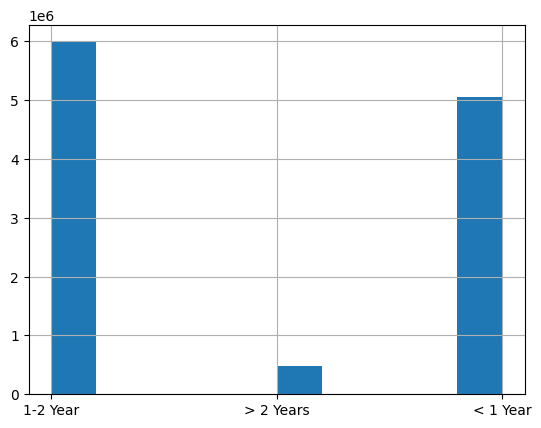

In [157]:
train.Vehicle_Age.hist()

+ here the edge case is that we have very few values for > 2 years, so we can probably merge the column into above 1 year and less than 1 year

<Axes: >

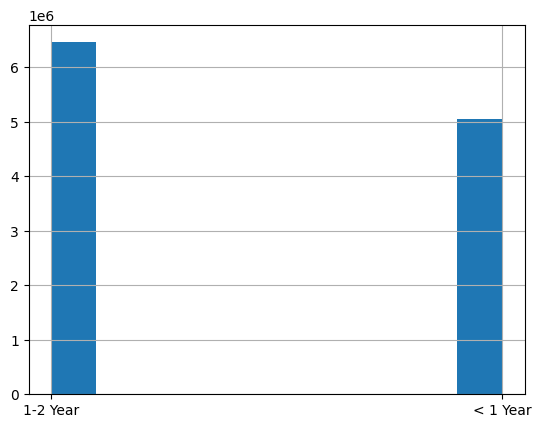

In [158]:
# Change > 2 Years to 1 - 2 Years

train.Vehicle_Age = train.Vehicle_Age.replace({'> 2 Years': '1-2 Year'})
test.Vehicle_Age = test.Vehicle_Age.replace({'> 2 Years': '1-2 Year'})
train.Vehicle_Age.hist()

In [159]:
# perform label encoding on Vehicle_Age column

train.Vehicle_Age = train.Vehicle_Age.replace({'1-2 Year': 1, '< 1 Year': 0})
test.Vehicle_Age = test.Vehicle_Age.replace({'1-2 Year': 1, '< 1 Year': 0})
train

/var/folders/qw/h58s1rpd2c76jh0cn440ynbm0000gn/T/ipykernel_37046/1165230803.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Vehicle_Age = train.Vehicle_Age.replace({'1-2 Year': 1, '< 1 Year': 0})
/var/folders/qw/h58s1rpd2c76jh0cn440ynbm0000gn/T/ipykernel_37046/1165230803.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.Vehicle_Age = test.Vehicle_Age.replace({'1-2 Year': 1, '< 1 Year': 0})


,id,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,0,0,25,0,1,Yes,65101.0,124.0,187,0,False,True
1,1,30,25,0,1,Yes,58911.0,26.0,288,1,False,True
2,2,0,0,1,0,No,38043.0,152.0,254,0,True,False
3,3,30,0,0,1,Yes,2630.0,156.0,76,0,True,False
4,4,30,0,1,1,No,31951.0,152.0,294,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,30,0,0,1,Yes,27412.0,26.0,218,0,False,True
11504794,11504794,0,35,0,0,Yes,29509.0,152.0,115,1,True,False
11504795,11504795,0,25,1,0,No,2630.0,152.0,189,0,True,False
11504796,11504796,50,25,0,1,Yes,48443.0,26.0,274,1,True,False


<Axes: >

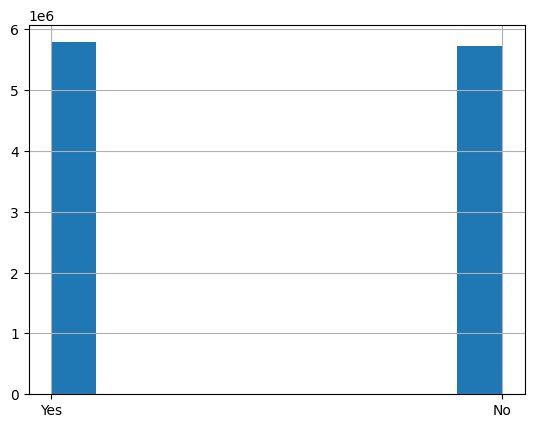

In [160]:
train.Vehicle_Damage.hist()

+ we can just convert it into a binary column of 0 and 1

In [161]:
# perform label encoding on Vehicle_Damage column

train.Vehicle_Damage = train.Vehicle_Damage.replace({'Yes': 1, 'No': 0})
test.Vehicle_Damage = test.Vehicle_Damage.replace({'Yes': 1, 'No': 0})
train

/var/folders/qw/h58s1rpd2c76jh0cn440ynbm0000gn/T/ipykernel_37046/84135843.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Vehicle_Damage = train.Vehicle_Damage.replace({'Yes': 1, 'No': 0})
/var/folders/qw/h58s1rpd2c76jh0cn440ynbm0000gn/T/ipykernel_37046/84135843.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.Vehicle_Damage = test.Vehicle_Damage.replace({'Yes': 1, 'No': 0})


,id,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,0,0,25,0,1,1,65101.0,124.0,187,0,False,True
1,1,30,25,0,1,1,58911.0,26.0,288,1,False,True
2,2,0,0,1,0,0,38043.0,152.0,254,0,True,False
3,3,30,0,0,1,1,2630.0,156.0,76,0,True,False
4,4,30,0,1,1,0,31951.0,152.0,294,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,30,0,0,1,1,27412.0,26.0,218,0,False,True
11504794,11504794,0,35,0,0,1,29509.0,152.0,115,1,True,False
11504795,11504795,0,25,1,0,0,2630.0,152.0,189,0,True,False
11504796,11504796,50,25,0,1,1,48443.0,26.0,274,1,True,False


In [162]:
# dropping id column

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
train

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,0,25,0,1,1,65101.0,124.0,187,0,False,True
1,30,25,0,1,1,58911.0,26.0,288,1,False,True
2,0,0,1,0,0,38043.0,152.0,254,0,True,False
3,30,0,0,1,1,2630.0,156.0,76,0,True,False
4,30,0,1,1,0,31951.0,152.0,294,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
11504793,30,0,0,1,1,27412.0,26.0,218,0,False,True
11504794,0,35,0,0,1,29509.0,152.0,115,1,True,False
11504795,0,25,1,0,0,2630.0,152.0,189,0,True,False
11504796,50,25,0,1,1,48443.0,26.0,274,1,True,False


In [163]:
# value counts of Annual_Premium in percentage

train.Annual_Premium.value_counts(normalize=True) * 100

Annual_Premium
2630.0     18.362435
38287.0     0.055307
39008.0     0.045937
38452.0     0.041035
28861.0     0.040600
             ...    
77839.0     0.000009
67126.0     0.000009
15999.0     0.000009
59067.0     0.000009
64538.0     0.000009
Name: proportion, Length: 51728, dtype: float64

In [164]:
train_Annual_Premium = pd.cut(train.Annual_Premium, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 100000], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
test_Annual_Premium = pd.cut(test.Annual_Premium, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 100000], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

<Axes: >

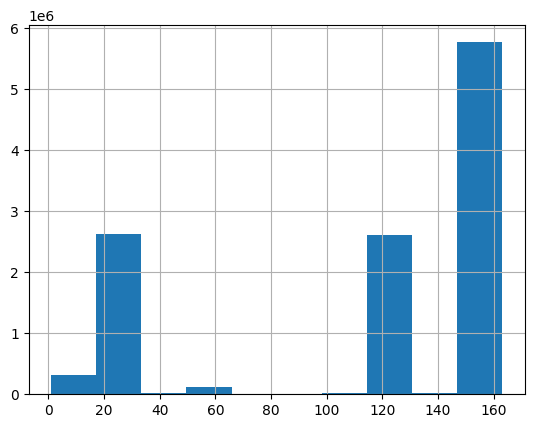

In [165]:
train.Policy_Sales_Channel.hist()

In [166]:
train.shape

(11504798, 11)

In [167]:
# remove rows with Policy_Sales_Channel value count less than 100

#train[train['Policy_Sales_Channel'].map(train['Policy_Sales_Channel'].value_counts()) > 10000]

In [168]:
# data loss

#(train.shape[0] - train[train['Policy_Sales_Channel'].map(train['Policy_Sales_Channel'].value_counts()) > 10000].shape[0]) / train.shape[0]


In [169]:
#allowed_sales_channels = train[train['Policy_Sales_Channel'].map(train['Policy_Sales_Channel'].value_counts()) > 10000]['Policy_Sales_Channel'].unique()

In [170]:
#train = train[train['Policy_Sales_Channel'].isin(allowed_sales_channels)]
#test = test[test['Policy_Sales_Channel'].isin(allowed_sales_channels)]
#train

<Axes: >

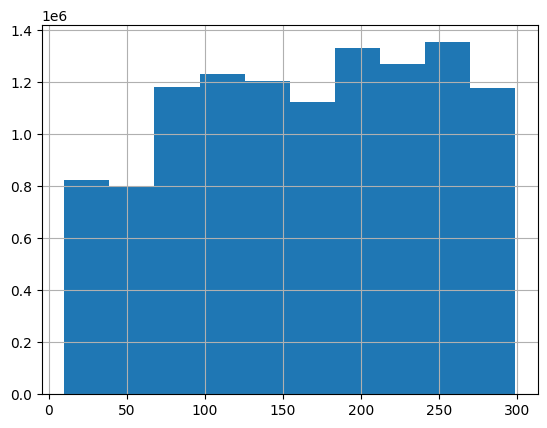

In [171]:
train.Vintage.hist()

+ I believe it can stay as it is

<Axes: >

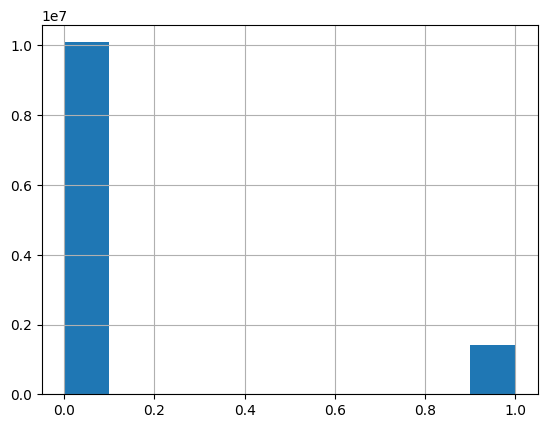

In [172]:
train.Response.hist()

In [173]:
train.Response.value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [174]:
# undesample value 0 in the response column

from sklearn.utils import resample
df_majority = train[train.Response==0]
df_minority = train[train.Response==1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=1300000, random_state=42)
df_majority_upsampled = resample(df_majority, replace=True, n_samples=1300000, random_state=42)
train_resampled = pd.concat([df_majority_upsampled, df_minority_upsampled])

In [175]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [176]:
test.shape

(7669866, 10)

In [177]:
X = train_resampled.drop('Response', axis=1)
y = train_resampled['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [178]:

clf = RandomForestClassifier(n_estimators=100, verbose=2, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    7.6s finished


In [179]:
print(accuracy)

0.8122897435897436


In [180]:
print(precision)

0.7825502453451637


In [181]:
print(recall)

0.8652057701227779


In [182]:
print(confusion)

[[295968  93815]
 [ 52599 337618]]


In [183]:
output_classes = clf.predict(test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   19.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   58.0s finished


In [184]:
final_submission = pd.DataFrame({'id': original.id, 'Response': output_classes})
final_submission.to_csv('submission.csv', index=False)

In [185]:
# train a XGB model

from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs = -1, enable_categorical = True)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print(confusion)
print(report)

0.8072179487179487
0.7455250114139592
0.9331782059725743
[[265488 124295]
 [ 26075 364142]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78    389783
           1       0.75      0.93      0.83    390217

    accuracy                           0.81    780000
   macro avg       0.83      0.81      0.80    780000
weighted avg       0.83      0.81      0.80    780000



In [186]:
output_classes = xgb.predict(test)
final_submission = pd.DataFrame({'id': original.id, 'Response': output_classes})
final_submission.to_csv('xgb_submission.csv', index=False)

In [187]:
# drop rows where Reigon code is null and also drop the same indices from y_train and y_test

# Identify the indices of rows with missing values in X_train
missing_indices = X_train[X_train.isna().any(axis=1)].index

# Drop these rows from both X_train and y_train
X_train_cleaned = X_train.drop(missing_indices)
y_train_cleaned = y_train.drop(missing_indices)

# Drop these rows from both X_test and y_test
missing_indices = X_test[X_test.isna().any(axis=1)].index
X_test_cleaned = X_test.drop(missing_indices)
y_test_cleaned = y_test.drop(missing_indices)

In [188]:
# scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_cleaned = scaler.fit_transform(X_train_cleaned)
X_test_cleaned = scaler.transform(X_test_cleaned)
X_test_cleaned

array([[-1.36776377,  0.38470529, -0.60050238, ...,  0.18145312,
         1.15390324, -1.15390324],
       [-1.36776377,  0.38470529,  1.66527234, ...,  1.21239453,
        -0.86662379,  0.86662379],
       [-1.36776377,  0.38470529,  1.66527234, ...,  1.09924243,
         1.15390324, -1.15390324],
       ...,
       [ 0.24531193, -1.48752112, -0.60050238, ...,  1.22496699,
         1.15390324, -1.15390324],
       [ 0.24531193,  0.38470529, -0.60050238, ...,  0.79750348,
         1.15390324, -1.15390324],
       [-1.36776377,  1.13359585, -0.60050238, ...,  0.45804716,
         1.15390324, -1.15390324]])

In [198]:
# train a MLP Classifier

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np



clf = MLPClassifier(hidden_layer_sizes=(1000, 500, 100, 50, 1), 
        max_iter=1000, 
        activation='relu',
        random_state=42,
        verbose = 2,
        alpha=0.00001,
        learning_rate_init=0.0001,

    )
clf.fit(X_train_cleaned, y_train_cleaned)
y_pred = clf.predict(X_test_cleaned)
accuracy = accuracy_score(y_test_cleaned, y_pred)
precision = precision_score(y_test_cleaned, y_pred)
recall = recall_score(y_test_cleaned, y_pred)
f1 = f1_score(y_test_cleaned, y_pred)
confusion = confusion_matrix(y_test_cleaned, y_pred)
report = classification_report(y_test_cleaned, y_pred)

print(accuracy)
print(precision)
print(recall)
print(confusion)
print(report)

Iteration 1, loss = 0.69648997
Iteration 2, loss = 0.69314865
Iteration 3, loss = 0.69314768


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5009011885389416
0.5009011885389416
1.0
[[     0 387676]
 [     0 389076]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    387676
           1       0.50      1.00      0.67    389076

    accuracy                           0.50    776752
   macro avg       0.25      0.50      0.33    776752
weighted avg       0.25      0.50      0.33    776752



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [192]:
test.isna().sum()

Age                         0
Region_Code             39320
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
Gender_Female               0
Gender_Male                 0
dtype: int64

In [190]:
test_transformed = scaler.transform(test)

In [191]:
output_classes = clf.predict(test_transformed)
final_submission = pd.DataFrame({'id': original.id, 'Response': output_classes})
final_submission.to_csv('mlp_submission.csv', index=False)

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [46]:
import os
# Set the number of threads
os.environ['OMP_NUM_THREADS'] = '8'
os.environ['TF_NUM_INTRAOP_THREADS'] = '8'
os.environ['TF_NUM_INTEROP_THREADS'] = '8'

In [ ]:
# train a neural network model

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [47]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


In [1]:
loss, accuracy = model.evaluate(X_test, y_test)

NameError: name 'model' is not defined